In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
from torchvision import datasets, transforms
from matplotlib import cm

batch_size = 32

train_dataset = datasets.CIFAR10('./data',
                               train=True,
                               download=False,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

test_dataset = datasets.CIFAR10('./data',
                                    train=False,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)

images = train_loader.dataset.data.reshape(-1, 32*32*3)
print(f'Num training images: {len(images)},\tmin val: {images.min():.3f},\tmax val: {images.max():.3f}')

Num training images: 50000,	min val: 0.000,	max val: 255.000


In [3]:
pca = PCA()
pca.fit(images)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance_ratio > 0.95)[0][0] + 1

In [4]:
pca = PCA(n_components=n_components)
pca.fit(images)

PCA(n_components=217)

In [6]:
n_images = 5
test_images = np.array(test_loader.dataset.data[:n_images].reshape((n_images, 32*32*3)))

PC_0 min: -0.0002,	PC_0 max: 0.0315
mean_img min: 99.9951,	mean_img max: 140.2688
Ammount to apply: -887.3160
PC_0 min: -0.0002,	PC_0 max: 0.0315
mean_img min: 99.9951,	mean_img max: 140.2688
Ammount to apply: 2535.5052
PC_0 min: -0.0002,	PC_0 max: 0.0315
mean_img min: 99.9951,	mean_img max: 140.2688
Ammount to apply: 1199.5964
PC_0 min: -0.0002,	PC_0 max: 0.0315
mean_img min: 99.9951,	mean_img max: 140.2688
Ammount to apply: 2051.8340
PC_0 min: -0.0002,	PC_0 max: 0.0315
mean_img min: 99.9951,	mean_img max: 140.2688
Ammount to apply: -1339.9269


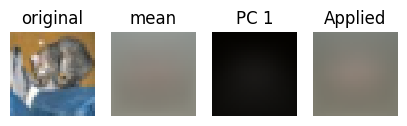

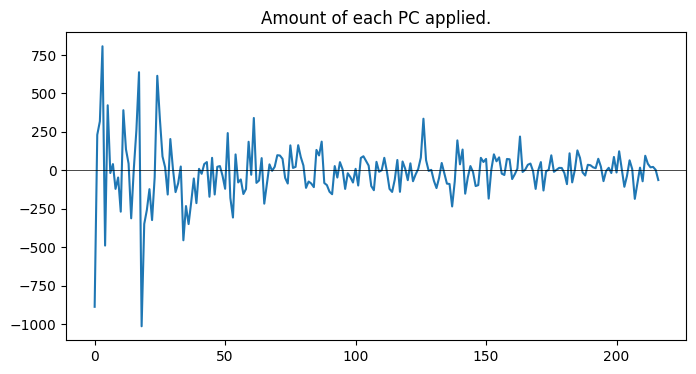

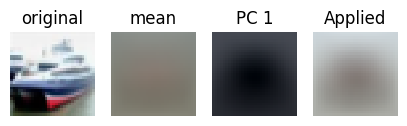

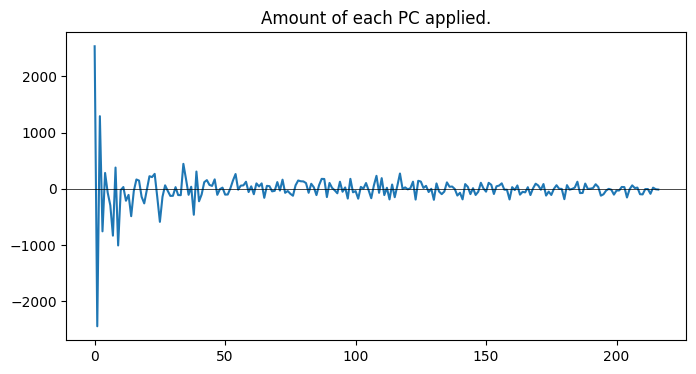

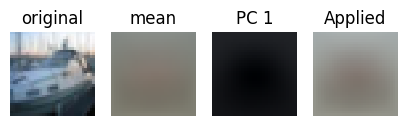

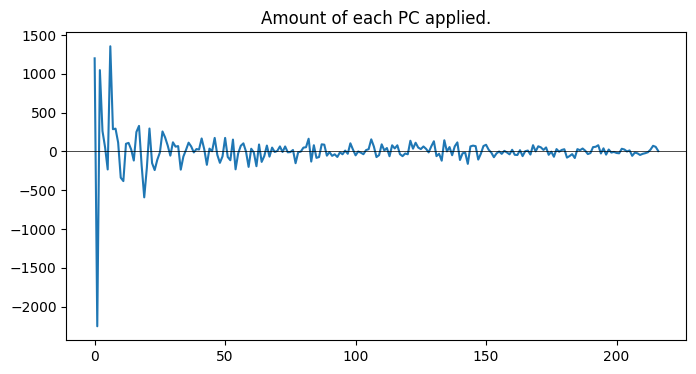

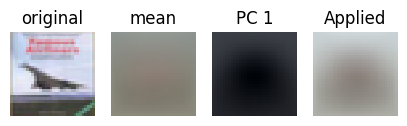

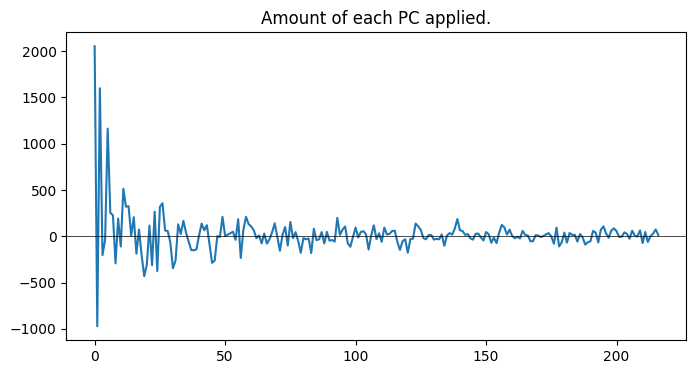

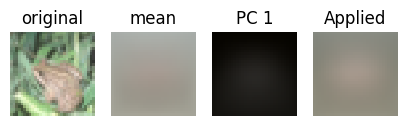

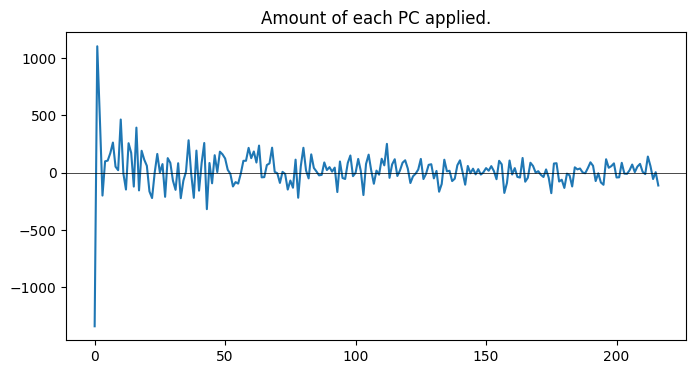

In [8]:
def draw_apply_PC0(idx):
    fig = plt.figure(figsize=(5,3))
    pca0_applied = pca.components_[0].reshape(32, 32, 3) * pca.transform(test_images)[idx][0]
    image = pca.mean_.reshape(32, 32, 3) + pca0_applied

    absmin = np.min([test_images[idx].min(), pca.mean_.min(), pca0_applied.min(), image.min()])
    absmax = np.max([test_images[idx].max(), pca.mean_.max(), pca0_applied.max(), image.max()])

    # Normalize the images
    test_image_normalized = (test_images[idx].reshape(32,32,3) - absmin) / (absmax - absmin)
    pca_mean_normalized = (pca.mean_.reshape(32,32,3) - absmin) / (absmax - absmin)
    pca0_applied_normalized = (pca0_applied - absmin) / (absmax - absmin)
    image_normalized = (image - absmin) / (absmax - absmin)

    ax_ = fig.add_subplot(1, 4, 1)
    ax_.imshow(test_image_normalized, interpolation='nearest');
    ax_.set_title(f'original')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 2)
    ax_.imshow(pca_mean_normalized, interpolation='nearest');
    ax_.set_title(f'mean')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 3)
    ax_.imshow(pca0_applied_normalized, interpolation='nearest');
    ax_.set_title(f'PC 1')
    ax_.axis('off')

    ax_ = fig.add_subplot(1, 4, 4)
    ax_.imshow(image_normalized, interpolation='nearest');
    ax_.set_title(f'Applied')
    ax_.axis('off')

    print(f'PC_0 min: {pca.components_[0].min():.4f},\tPC_0 max: {pca.components_[0].max():.4f}')
    print(f'mean_img min: {pca.mean_.min():.4f},\tmean_img max: {pca.mean_.max():.4f}')
    print(f'Ammount to apply: {pca.transform(test_images)[idx][0]:.4f}')

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    ax.plot(pca.transform(test_images[idx].reshape(1, -1)).flatten())
    ax.axhline(0, lw=.5, color='k') # horizontal lines

    ax.set_title('Amount of each PC applied.')

draw_apply_PC0(0)
draw_apply_PC0(1)
draw_apply_PC0(2)
draw_apply_PC0(3)
draw_apply_PC0(4)

## Nhận xét
- PCA giúp giảm chiều dữ liệu nhằm giảm bộ nhớ và tăng tốc độ huấn luyện mô hình, trong bài tập này em chọn số components sao cho phương sai là tầm 95% vì không muốn mất quá nhiều dữ liệu
